In [881]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [882]:
data = pd.read_csv("dataset.csv")
data.head()

,Unnamed: 0,X,ozone,radiation,temperature,wind
0,1,1,41,190,67,7.4
1,2,2,36,118,72,8.0
2,3,3,12,149,74,12.6
3,4,4,18,313,62,11.5
4,5,5,23,299,65,8.6


In [883]:
# first two columns are unnecessary (index)
data.drop(data.columns[[0, 1]], axis = 1, inplace = True)
data.head()

,ozone,radiation,temperature,wind
0,41,190,67,7.4
1,36,118,72,8.0
2,12,149,74,12.6
3,18,313,62,11.5
4,23,299,65,8.6


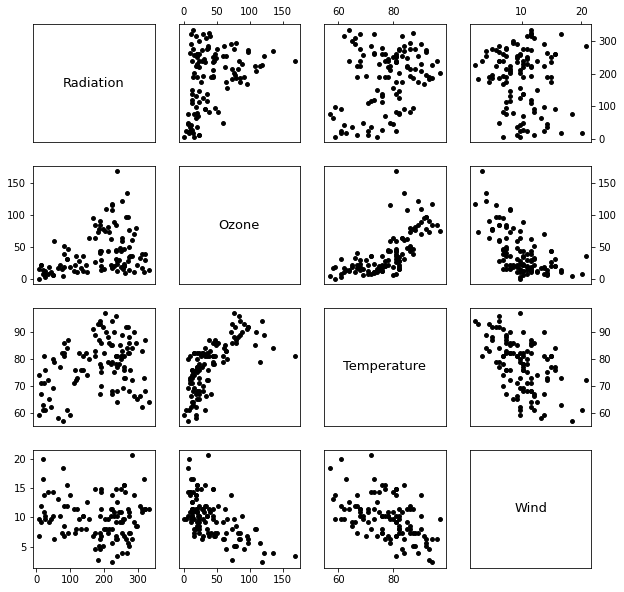

In [884]:
labels = ["radiation", "ozone", "temperature", "wind"]
fig, axs = plt.subplots(4, 4)
fig.set_size_inches(10, 10)
for i in range(4):
    for j in range(4):
        axs[i, j].axes.xaxis.set_visible(False)
        axs[i, j].axes.yaxis.set_visible(False)
        if i == j:
            axs[i, j].plot()
            axs[i, j].text(.5, .5, labels[i].capitalize(),  horizontalalignment='center', verticalalignment='center', transform=axs[i, j].transAxes, fontsize=13)
        else:
            if i == 0 or i == 3:
                axs[i, j].axes.xaxis.set_visible(True)
            if i == 0:
                axs[i, j].xaxis.tick_top()
            if j == 0 or j == 3:
                axs[i, j].axes.yaxis.set_visible(True)
            if j == 3:
                axs[i, j].yaxis.tick_right()
            axs[i, j].scatter(data[labels[j]], data[labels[i]], s=15, color="black")

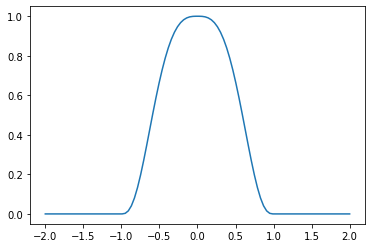

In [885]:
def tricubic(x):
    y = np.zeros_like(x)
    idx = (x >= -1) & (x <= 1)
    y[idx] = np.power(1.0 - np.power(np.abs(x[idx]), 3), 3)
    return y
plt.plot(np.linspace(-2, 2, 100), [tricubic(x) for x in np.linspace(-2, 2, 100)])

In [889]:
def estimate(X, Y, x, f):
    q = int(f * len(data))
    standarized_X = (X - X.mean()) / X.std()
    standarized_Y = (Y - Y.mean()) / Y.std()
    standarized_x = (x - X.mean()) / X.std()

    # get q nearest neighbors
    distances = np.linalg.norm(standarized_X - standarized_x, axis=1)
    sorted_distances = np.sort(distances)
    sorted_index = np.argsort(distances)
    nearest_X = standarized_X.iloc[sorted_index[1:q+1]]
    nearest_Y = standarized_Y.iloc[sorted_index[1:q+1]]

    # get weights
    d = sorted_distances[q]
    weights = tricubic(sorted_distances[1:q+1] / d)
    W = np.diag(weights)
    
    # get estimate
    A = np.array(nearest_X)
    b = np.array(nearest_Y)
    beta = np.linalg.inv(A.T @ W @ A) @ A.T @ W @ b
    res = beta.T @ standarized_x
    return res * Y.std()["ozone"] + Y.mean()["ozone"]


In [890]:
X = data[["radiation", "temperature", "wind"]]
Y = data[["ozone"]]

In [891]:
estimations = []
for i in range(len(data)):
    estimations.append(estimate(X, Y, X.iloc[i], 0.4))
data["estimation"] = estimations
data["residual"] = data["ozone"] - data["estimation"]

     radiation  temperature      wind
107   0.089940    -0.817714 -0.853766
1    -0.732859    -0.607850 -0.544709
100   0.583619    -1.027579  0.101500
7     0.781091    -0.922647 -0.067076
109  -0.590241    -0.188122 -0.544709
        ozone
107 -0.363599
1   -0.183288
100 -0.543909
7   -0.784323
109 -0.724219
     radiation  temperature      wind
109  -0.590241    -0.188122 -0.544709
70   -0.765771    -0.188122 -0.713286
32   -0.524417    -0.188122  0.101500
107   0.089940    -0.817714 -0.853766
0     0.057028    -1.132511 -0.713286
        ozone
109 -0.724219
70  -0.573961
32  -0.874478
107 -0.363599
0   -0.033030
     radiation  temperature      wind
31   -0.710918    -0.502918  0.438653
96   -0.798683    -0.712782  0.438653
108   0.067998    -0.293054  1.225343
32   -0.524417    -0.188122  0.101500
28    0.067998    -0.083189  1.393919
        ozone
31  -0.904530
96  -0.874478
108 -0.844426
32  -0.874478
28  -0.634064
    radiation  temperature      wind
11   1.636801    -1.447307 

Text(0, 0.5, 'Absolute Residuals')

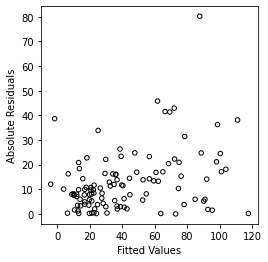

In [ ]:
fig, ax = plt.subplots()
ax.set_box_aspect(1)
plt.scatter(data["estimation"], abs(data["residual"]), facecolors='none', edgecolors='black', s=20)
plt.xlabel("Fitted Values")
plt.ylabel("Absolute Residuals")

Text(0, 0.5, 'Residuals')

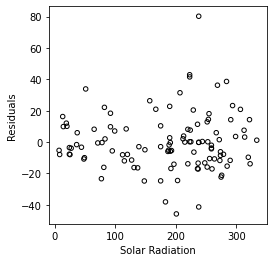

In [ ]:
fig, ax = plt.subplots()
ax.set_box_aspect(1)
plt.scatter(data["radiation"], data["residual"], facecolors='none', edgecolors='black', s=20)
plt.xlabel("Solar Radiation")
plt.ylabel("Residuals")

Text(0, 0.5, 'Residuals')

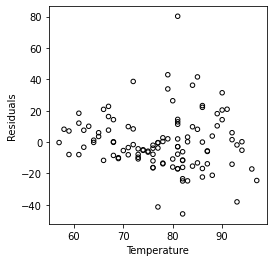

In [ ]:
fig, ax = plt.subplots()
ax.set_box_aspect(1)
plt.scatter(data["temperature"], data["residual"], facecolors='none', edgecolors='black', s=20)
plt.xlabel("Temperature")
plt.ylabel("Residuals")

Text(0, 0.5, 'Residuals')

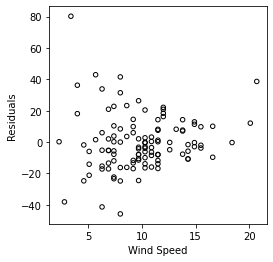

In [ ]:
fig, ax = plt.subplots()
ax.set_box_aspect(1)
plt.scatter(data["wind"], data["residual"], facecolors='none', edgecolors='black', s=20)
plt.xlabel("Wind Speed")
plt.ylabel("Residuals")